### 0. Importing packages

In [57]:
import pandas as pd
import numpy as np
from warnings import simplefilter
import seaborn as sns
simplefilter(action="ignore",category=FutureWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 1. Load in data

In [58]:
path_to_data = "../data/"
gender_submission = pd.read_csv(path_to_data + "gender_submission.csv")
X_test = pd.read_csv(path_to_data + "test.csv")
X_train = pd.read_csv(path_to_data + "train.csv")

### 2. Data Visualisations

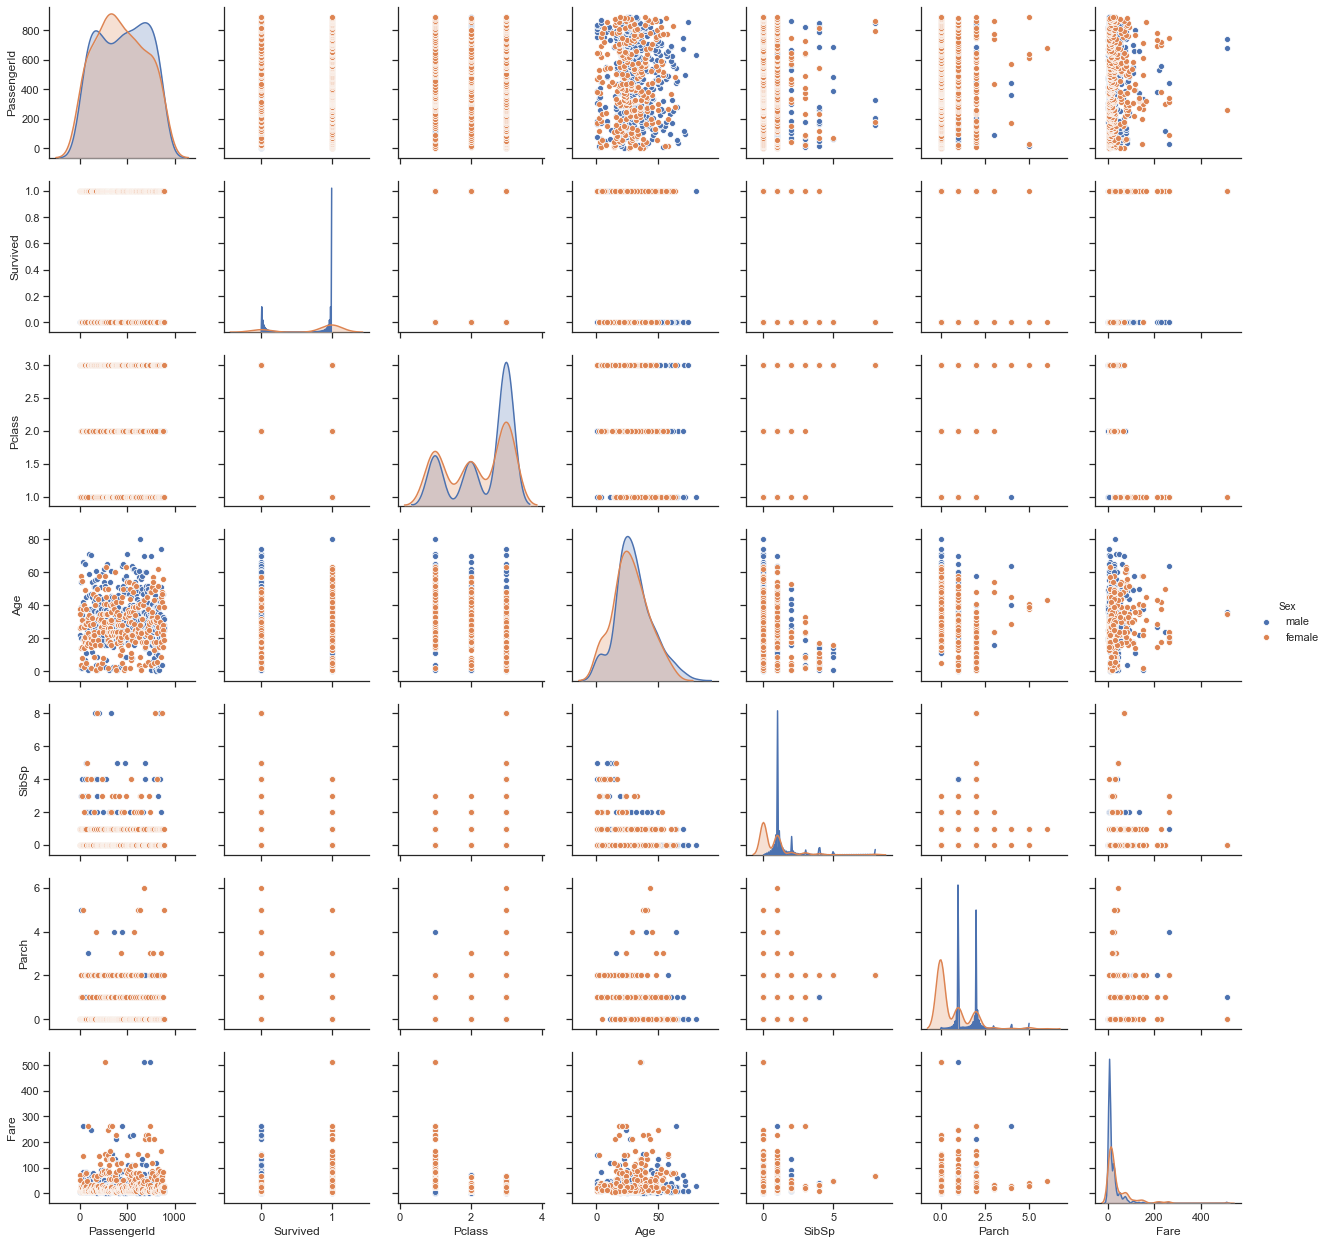

In [65]:
sns.set(style="ticks")
sns.pairplot(X_train, hue="Sex")

### 3. Correlation

In [95]:
# correlation matrix only works with numeric data
df = pd.get_dummies(X_train, columns=['Sex'])
corr = df.corr()

In [96]:
corr['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Sex_female     0.543351
Sex_male      -0.543351
Name: Survived, dtype: float64

In [86]:
X_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
import re
test_df = X_train.copy()
test_df['title'] = test_df['Name'].str.split([","])

In [130]:
titles = test_df['Name'].apply(lambda x: x.split(',')[1].split(".")[0]).unique().tolist()

In [131]:
titles.

[' Mr',
 ' Mrs',
 ' Miss',
 ' Master',
 ' Don',
 ' Rev',
 ' Dr',
 ' Mme',
 ' Ms',
 ' Major',
 ' Lady',
 ' Sir',
 ' Mlle',
 ' Col',
 ' Capt',
 ' the Countess',
 ' Jonkheer']

In [113]:
test_df[['title','Name']]

,title,Name
0,"[Braund, Mr. Owen Harris]","Braund, Mr. Owen Harris"
1,"[Cumings, Mrs. John Bradley (Florence Briggs ...","Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"[Heikkinen, Miss. Laina]","Heikkinen, Miss. Laina"
3,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]","Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"[Allen, Mr. William Henry]","Allen, Mr. William Henry"
...,...,...
886,"[Montvila, Rev. Juozas]","Montvila, Rev. Juozas"
887,"[Graham, Miss. Margaret Edith]","Graham, Miss. Margaret Edith"
888,"[Johnston, Miss. Catherine Helen ""Carrie""]","Johnston, Miss. Catherine Helen ""Carrie"""
889,"[Behr, Mr. Karl Howell]","Behr, Mr. Karl Howell"


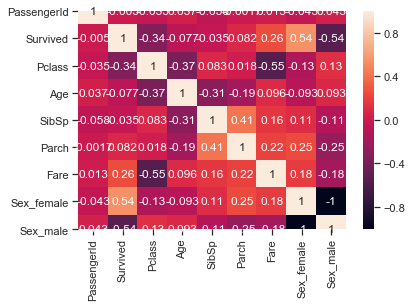

In [139]:
sns.heatmap(corr,annot=True)

In [105]:
X_train[X_train['Age'].isna()][['Name','Age']]
# make a rule to give Mr. average male age, Master lower quartile age,
# Mrs. average female age, and Miss lower quartile age

#split the name field on commas and .
X_train['Title'].split('.')


,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN
32,"Glynn, Miss. Mary Agatha",NaN
36,"Mamee, Mr. Hanna",NaN
42,"Kraeff, Mr. Theodor",NaN


In [103]:
X_train[X_train['Age'].isna()]['Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
29    NaN
31    NaN
32    NaN
36    NaN
42    NaN
45    NaN
46    NaN
47    NaN
48    NaN
55    NaN
64    NaN
65    NaN
76    NaN
77    NaN
82    NaN
87    NaN
95    NaN
101   NaN
107   NaN
109   NaN
121   NaN
126   NaN
128   NaN
140   NaN
154   NaN
158   NaN
159   NaN
166   NaN
168   NaN
176   NaN
180   NaN
181   NaN
185   NaN
186   NaN
196   NaN
198   NaN
201   NaN
214   NaN
223   NaN
229   NaN
235   NaN
240   NaN
241   NaN
250   NaN
256   NaN
260   NaN
264   NaN
270   NaN
274   NaN
277   NaN
284   NaN
295   NaN
298   NaN
300   NaN
301   NaN
303   NaN
304   NaN
306   NaN
324   NaN
330   NaN
334   NaN
335   NaN
347   NaN
351   NaN
354   NaN
358   NaN
359   NaN
364   NaN
367   NaN
368   NaN
375   NaN
384   NaN
388   NaN
409   NaN
410   NaN
411   NaN
413   NaN
415   NaN
420   NaN
425   NaN
428   NaN
431   NaN
444   NaN
451   NaN
454   NaN
457   NaN
459   NaN
464   NaN
466   NaN
468   NaN
470   NaN
475   NaN
481   NaN
485   NaN
490   NaN
